## Validation Projet Machine Learning

#### I. Business understanding:

##### 1 .Project Definition

 Taiwan-based credit card issuer wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform
the issuer’s decisions on who to give a credit card to and what credit limit to provide.
It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted
credit products to their customers

##### 2 . Problem

Credit card is a flexible tool by which you can use bank’s money for a short period of time. If
you accept a credit card, you agree to pay your bills by the due date listed on your credit card
statement. Otherwise, the credit card will be defaulted. When a customer is not able to pay
back the loan by the due date and the bank is totally certain that they are not able to collect
the payment, it will usually try to sell the loan. After that, if the bank recognizes that they are
not able to sell it, they will write it off.
This is called a charge-off. This results in significant financial losses to the bank on top of the
damaged credit rating of the customer and thus it is an important problem to be tackled.

##### 3 .goal

In this project, we will build a machine learning model to predict the defaulters clients

##### 4 .features's definition

❍	ID:unique identification number assigned to each customer.

❍	LIMIT_BAL:amount of given credit access line.

❍	SEX:gender (1 = male; 2 = female).

❍	EDUCATION:highest degree obtained (1 = graduate school; 2 = university; 3 = high school; 4,5,6 = others)

❍	MARRIAGE: marital status (1 = married; 2 = single; 3 = others).

❍	AGE: age in year.

❍	PAY0: monthly payment record in September .

❍	PAY2: monthly payment record in August.

❍	PAY3: monthly payment record in July.

❍	PAY4: monthly payment record in June.

❍	PAY5: monthly payment record in May.

❍	PAY6 : monthly payment record in April.

❍	BILL_AMT1: total amount owed in September.

❍	BILL_AMT2: total amount owed in August.
 
❍	BILL_AMT3 : total amount owed in July.

❍	BILL_AMT4: total amount owed in June.

❍	BILL_AMT5: total amount owed in May.

❍	BILL_AMT6: total amount owed in April.

❍	PAY_AMT1: amount of previous payment in September.

❍	PAY_AMT2: amount of previous payment in August.

❍	PAY_AMT3: amount of previous payment in July.

❍	PAY_AMT4: amount of previous payment in June.

❍	PAY_AMT5: amount of previous payment in May.

❍	PAY_AMT6: amount of previous payment in April.


#### II. Data understanding

##### 1-Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### 2-Import our database

In [2]:
df = pd.read_excel("default of credit card clients.xls")

In [3]:
#display the first 5 rows
df.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


##### 3-modify features's name

In [4]:
#we will rename the columns by the first row
df = df.rename(columns=df.iloc[0])
# we will modify the column names by a shorter name to facilitate handling
df = df.rename(columns={'Unnamed: 0': 'ID','default payment next month':'def_pay','PAY_0': 'PAY_1'})
# we will eliminate the first line of our dataset
df = df[1:]


In [5]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


##### 4-display the dimensions of the database

In [6]:
#display the dimensions of the database
print(" * Nonmbre de lignes =", df.shape[0] )
print(" * Nonmbre de colonnes =:", df.shape[1] )

 * Nonmbre de lignes = 30000
 * Nonmbre de colonnes =: 25


##### 5-Type of features

In [7]:
#display the type of each feature
print(df.dtypes)

ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_1        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
def_pay      object
dtype: object


In [8]:
#we will change the type of each column
df = df.astype({'ID': 'int64', 'LIMIT_BAL': 'float64','SEX': 'int64', 'EDUCATION': 'int64','MARRIAGE': 'int64', 'AGE': 'int64','PAY_1': 'int64','PAY_2': 'int64','PAY_3': 'int64','PAY_4': 'int64','PAY_5': 'int64','PAY_6': 'int64', 'BILL_AMT1': 'float64', 'BILL_AMT2': 'float64', 'BILL_AMT3': 'float64', 'BILL_AMT4': 'float64', 'BILL_AMT5': 'float64', 'BILL_AMT6': 'float64', 'PAY_AMT1': 'float64', 'PAY_AMT2': 'float64', 'PAY_AMT3': 'float64', 'PAY_AMT4': 'float64', 'PAY_AMT5': 'float64', 'PAY_AMT6': 'float64', 'def_pay': 'int64'})

In [9]:
#display the type of each feature
print(df.dtypes)

ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
def_pay        int64
dtype: object


##### 6-change the index of our dataset

In [10]:
#set the ID as the index of our dataset
df.index = df['ID']
df.drop('ID',axis=1,inplace=True)

In [11]:
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##### 7-NULL values

In [12]:
#Count the number of NULL values in each column
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

##### 8-uniqueness of features

In [13]:
# Check the uniqueness of the contents of the variables (the unique value of each column)
for col in df.columns:
    print(col)
    print(df[col].unique())

LIMIT_BAL
[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX
[2 1]
EDUCATION
[2 1 3 5 4 6 0]
MARRIAGE
[1 2 3 0]
AGE
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_1
[ 2 -1  0 -2

##### 9-statistical description

In [14]:
#a detailed statistical description on the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


##### 10-the unknown values

In [15]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
# we will modify the values 0, 5 and 6 of the education column. we will group them in others
df.loc[(df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6) , 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

#####  11-Data Visualization

##### a)create a copy of our data

In [17]:
#we will create a copy of our dataset so that the visualization will be clear
preprocessed_df = df.copy()

In [18]:
#we will translate the numerical values by their meaning so we can understand the graphs better
preprocessed_df.SEX = preprocessed_df.SEX.map({1:'Male', 2:'Female'})
preprocessed_df.def_pay = preprocessed_df.def_pay.map({0:'No', 1:'Yes'})

preprocessed_df.EDUCATION = preprocessed_df.EDUCATION.map({1:'Graduate School',
                                                          2:'University',
                                                          3:'High School',
                                                          4:'Others'})

preprocessed_df.MARRIAGE = preprocessed_df.MARRIAGE.map({0:'Others',
                                                        1:'Married',
                                                        2:'Single', 
                                                        3:'Divorced'})

##### b)plotting categorical features

In [19]:
#this function allows you to create custom category graphs and below the graph it displays
#the percentage of each category compared to the totals
#order, hue_order : (optional) This parameter take lists of strings and order them
def plot_categorical_count(df, col, hue=None, hue_order=None, is_pct=True, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    #Show value counts for two categorical variables and using hue parameter:
    g = sns.countplot(data=df, x=col, hue=hue, hue_order=None)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), va='bottom', ha='center', size=14)
     #removing top and right borders   
    g.spines['top'].set_visible(False)
    g.spines['left'].set_visible(False)
    g.spines['right'].set_visible(False)
     #Show the plot
    plt.show()
    
    if is_pct:
        print()
        print("Percentage share of each category:")
        print(df[col].value_counts(normalize=True)*100)

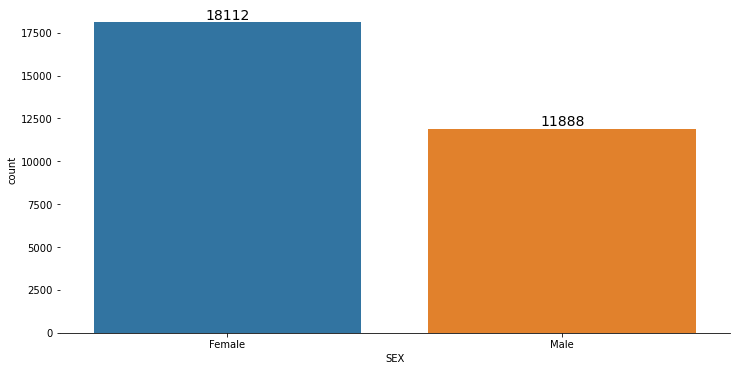


Percentage share of each category:
Female    60.373333
Male      39.626667
Name: SEX, dtype: float64


In [20]:
plot_categorical_count(preprocessed_df, 'SEX')

We can see from the plot bellow that the number of female are more important with 60,37%
comparing it with the number of male with 39,62%.

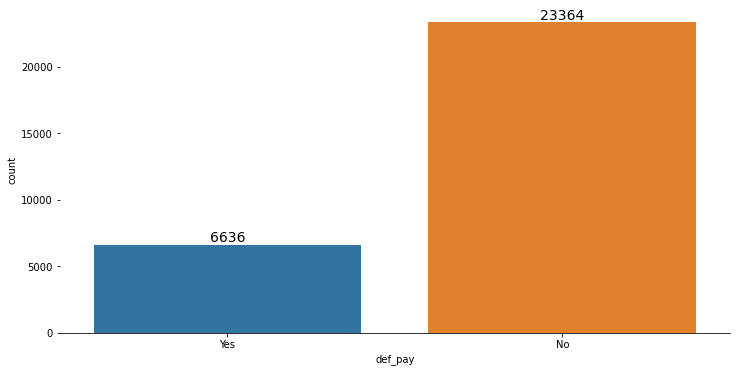


Percentage share of each category:
No     77.88
Yes    22.12
Name: def_pay, dtype: float64


In [21]:
plot_categorical_count(preprocessed_df, 'def_pay')

the graph at the top. gives us the information about the default pay. we find that the number of NO values are much greater than the YES

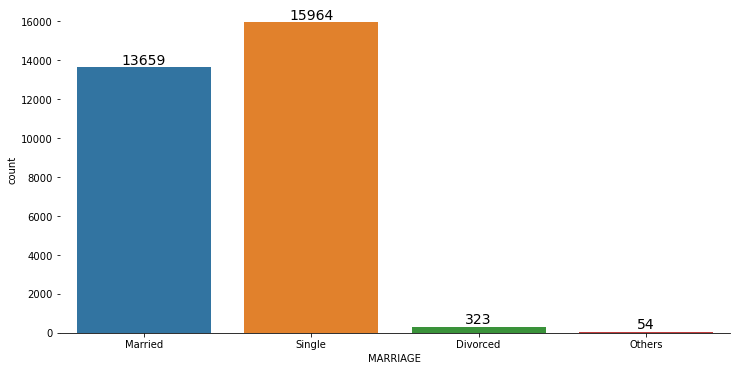


Percentage share of each category:
Single      53.213333
Married     45.530000
Divorced     1.076667
Others       0.180000
Name: MARRIAGE, dtype: float64


In [22]:
plot_categorical_count(preprocessed_df, 'MARRIAGE')

the next graph  is giving  information about the marriage status.We can notice that 6636 customers (approximately 22.12%
of the entire data set) will default in the next month’s payment, while 23364 will not default.
This result is quite reasonable because the difference is insignificant so that this data set should
not have much biased information and can be used in our further analysis.


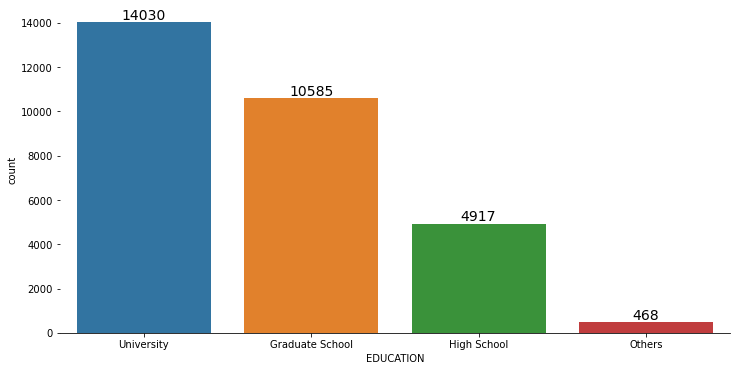


Percentage share of each category:
University         46.766667
Graduate School    35.283333
High School        16.390000
Others              1.560000
Name: EDUCATION, dtype: float64


In [23]:
plot_categorical_count(preprocessed_df, 'EDUCATION')

then,in Education visualisation  we can see that the number of Single clients is the most important with 53.21% (15964 clients), then we have the married ones with 45.53%. At the bottom we have the Divorced and others with 1.18% (377 clients).

In [24]:
#this function made a table to compare the percentage of payment according to each object value 
def default_df(df, col):
    df1 = pd.crosstab(index=df[col], columns=df.def_pay, margins=True)
    df1.rename(columns={'No':'total_no_default', 'Yes':'total_yes_default', 'All':'total_default'}, inplace=True)
    
    df2 = pd.crosstab(index=df[col], columns=df.def_pay, normalize='index', margins=True)
    df2.rename(columns={'No':'percentage_no_default', 'Yes':'percentage_yes_default'}, inplace=True)
    
    final_df = pd.concat([df1, df2], axis=1)
    
    return final_df

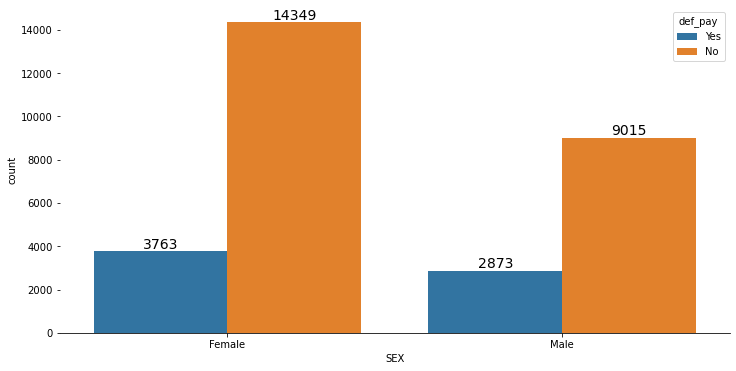

def_pay,total_no_default,total_yes_default,total_default,percentage_no_default,percentage_yes_default
SEX,,,,,
Female,14349,3763,18112,0.792237,0.207763
Male,9015,2873,11888,0.758328,0.241672
All,23364,6636,30000,0.778800,0.221200


In [25]:
plot_categorical_count(preprocessed_df, col='SEX', hue='def_pay', is_pct=False)
default_df(preprocessed_df, 'SEX')

It is clear from the above result that women generally have less percentage of default payments than men . Non-Defaults have a higher proportion of Females

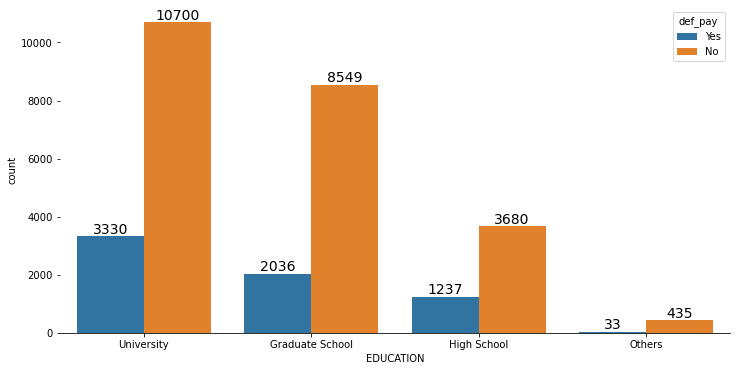

def_pay,total_no_default,total_yes_default,total_default,percentage_no_default,percentage_yes_default
EDUCATION,,,,,
Graduate School,8549,2036,10585,0.807652,0.192348
High School,3680,1237,4917,0.748424,0.251576
Others,435,33,468,0.929487,0.070513
University,10700,3330,14030,0.762651,0.237349
All,23364,6636,30000,0.778800,0.221200


In [26]:
plot_categorical_count(preprocessed_df, col='EDUCATION', hue='def_pay', is_pct=False)
default_df(preprocessed_df, 'EDUCATION')

From the above plot it is clear that those people who are graduates  have less percentage default payment than university students and high school people

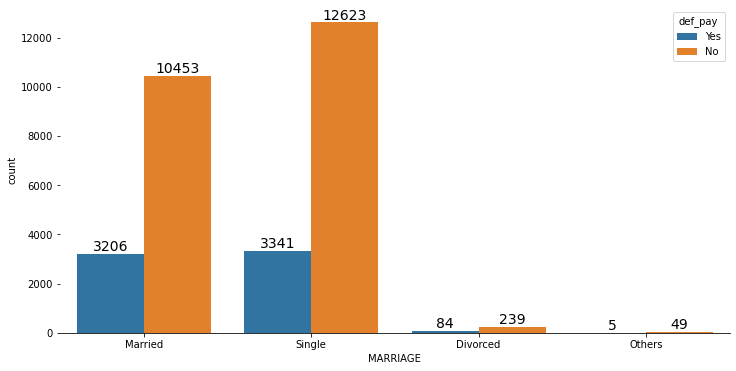

def_pay,total_no_default,total_yes_default,total_default,percentage_no_default,percentage_yes_default
MARRIAGE,,,,,
Divorced,239,84,323,0.739938,0.260062
Married,10453,3206,13659,0.765283,0.234717
Others,49,5,54,0.907407,0.092593
Single,12623,3341,15964,0.790717,0.209283
All,23364,6636,30000,0.778800,0.221200


In [27]:
plot_categorical_count(preprocessed_df, col='MARRIAGE', hue='def_pay', is_pct=False)
default_df(preprocessed_df, 'MARRIAGE')

From the above plot it is clear that those people who have marital status single have less default payment than married status people and divorced people

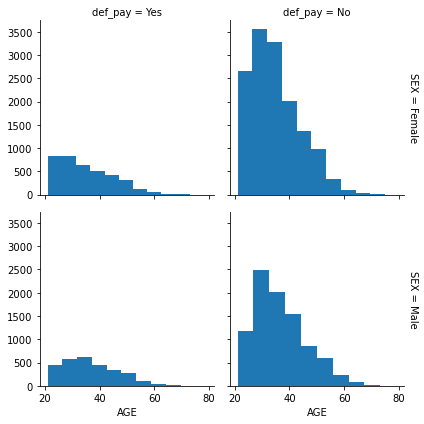

In [28]:
g = sns.FacetGrid(preprocessed_df, col = 'def_pay', row = 'SEX',margin_titles=10)
g.map(plt.hist, 'AGE')

From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of people 30-40years

##### c)plotting numerical features

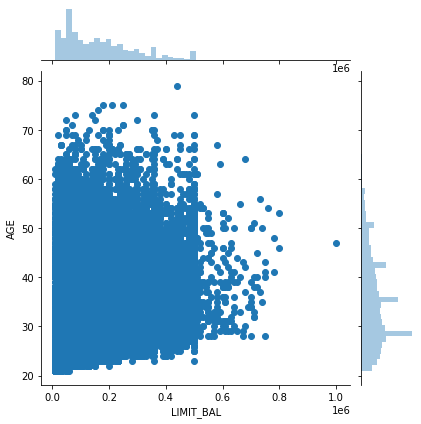

In [29]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=preprocessed_df,kind="scatter")

when the age increases the limit balance (LIMIT_BAL)increases as well.

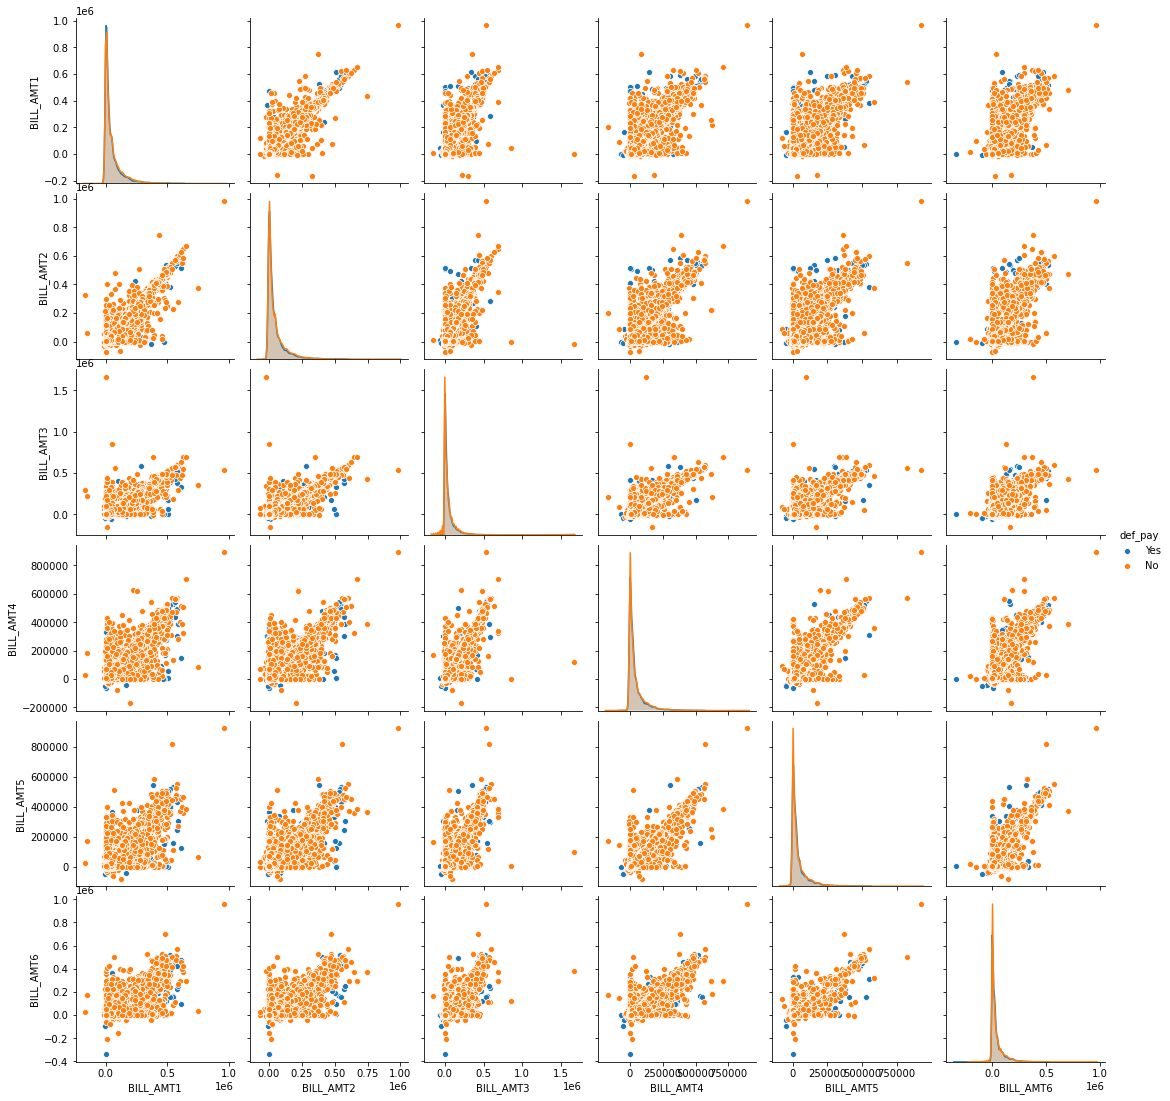

In [30]:
sns.pairplot(preprocessed_df, vars=df.columns[11:17], kind='scatter',hue= 'def_pay')

the slope is increasing so we can conclude from this graph that if the amount of the BILL_AMT is high. the next month's bill will be more expensive

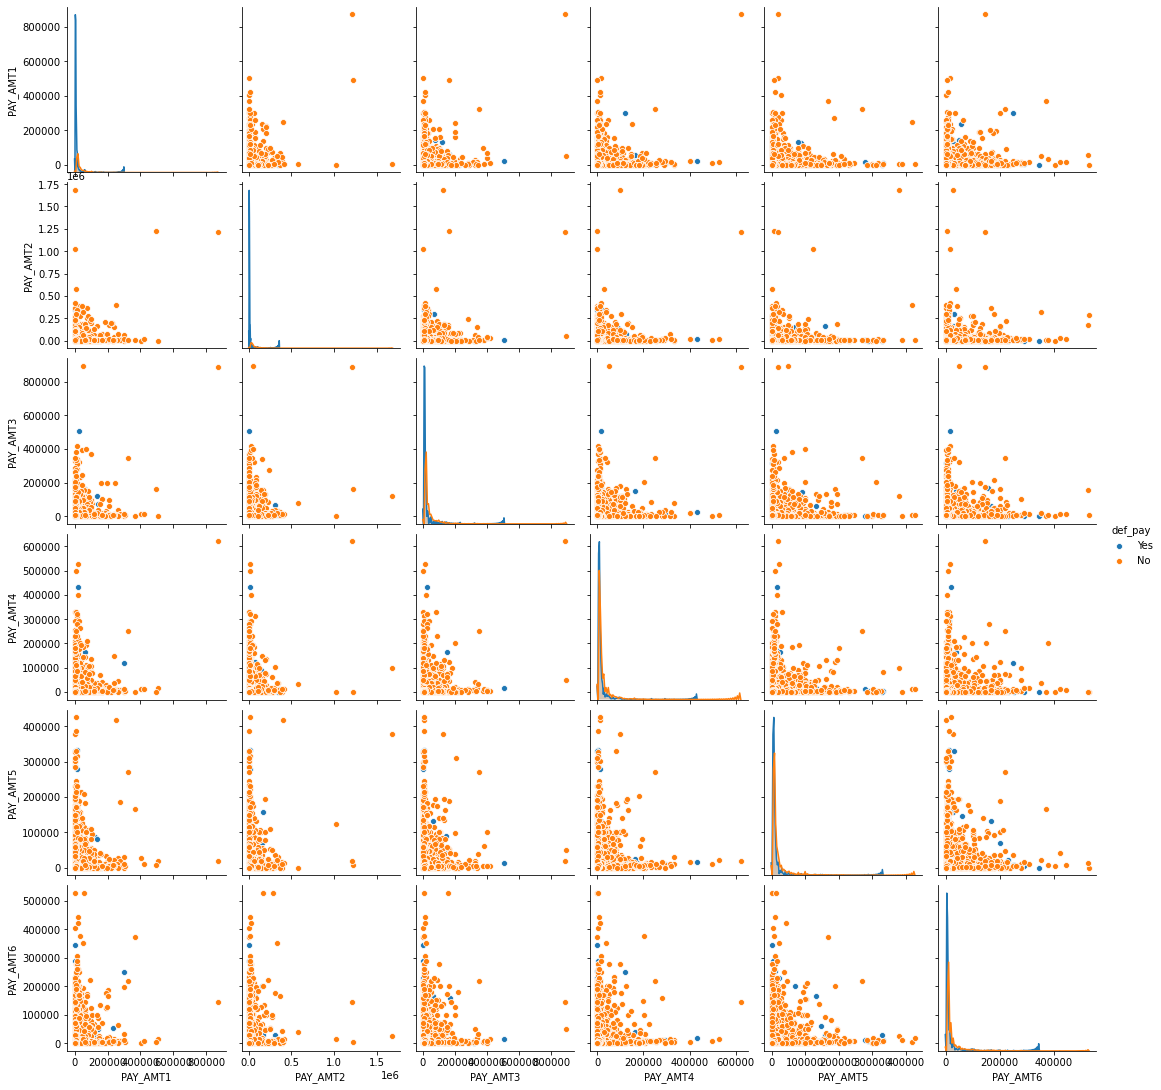

In [31]:
sns.pairplot(preprocessed_df, vars=df.columns[17:23], kind='scatter',hue = 'def_pay')

if someone pay a little bit more this month the next one will pay more less

#####  12-Corrolation

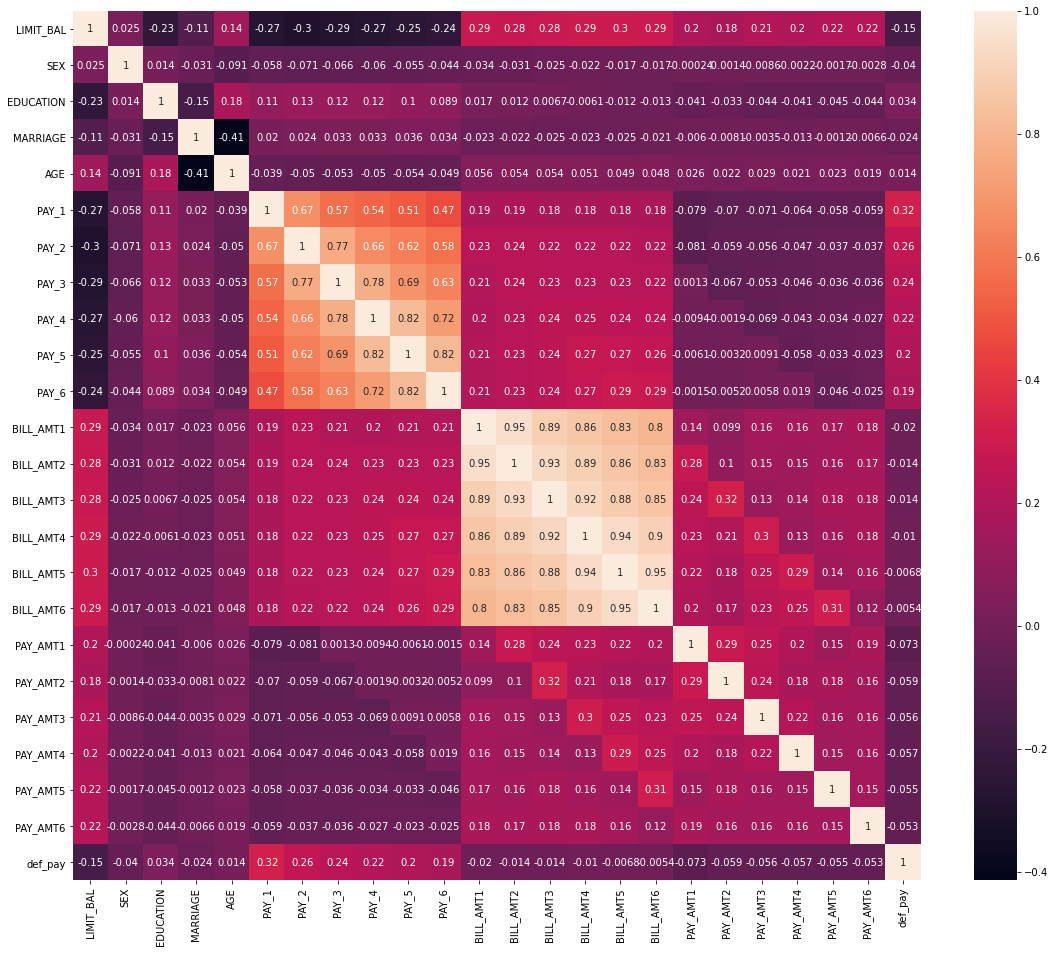

In [32]:
f = plt.figure(figsize=(19, 16))
sns.heatmap(df.corr(), annot=True)
plt.show()

So it looks like the PAY_1 -> PAY_X variables are the strongest predictors of default pay, followed by the LIMIT_BAL and PAY_AMT_X variables .
and we can say that PAY_1 -> PAY_X are strongly correlated . same for BILL_AMT .

#### III. Data preparation 

##### 1-Data Cleaning

##### a)Erroneous Data

we  check the false data month by month (if there is a contradiction between the values of features pay = -2 and the values of two features bill_amt and pay_amt. we will erase the erroneous row)

In [33]:
indexNames = df[ ((df['BILL_AMT1']==(df['BILL_AMT2'] ))&(df['PAY_AMT1']==0) &(df['BILL_AMT1']<=0)  &(df['PAY_1'] != -2)) ].index
df.drop(indexNames , inplace=True)
indexNames = df[ ((df['BILL_AMT2']==(df['BILL_AMT3'] ))&(df['PAY_AMT2']==0) &(df['BILL_AMT2']<=0)  &(df['PAY_2'] != -2)) ].index
df.drop(indexNames , inplace=True)
indexNames = df[ ((df['BILL_AMT3']==(df['BILL_AMT4'] ))&(df['PAY_AMT3']==0)  &(df['BILL_AMT3']<=0)  &(df['PAY_3'] != -2)) ].index
df.drop(indexNames , inplace=True)
indexNames = df[ ((df['BILL_AMT4']==(df['BILL_AMT5'] ))&(df['PAY_AMT4']==0)  &(df['BILL_AMT4']<=0) &(df['PAY_4'] != -2)) ].index
df.drop(indexNames , inplace=True)
indexNames = df[ ((df['BILL_AMT5']==(df['BILL_AMT6']))&(df['PAY_AMT5']==0)  &(df['BILL_AMT5']<=0) &(df['PAY_5'] != -2)) ].index
df.drop(indexNames , inplace=True)


we will check the false data month by month (if there is a contradiction between the values of features pay = -1 and the values of two features bill_amt and pay_amt. we will erase the erroneous row)

In [34]:
indexNames = df[ ((df['BILL_AMT1']-df['PAY_AMT1']<0)&(df['BILL_AMT1']<=0)&(df['PAY_1'] != -1)&(df['PAY_1']!=-2) )].index
df.drop(indexNames , inplace=True)
indexNames = df[ ((df['BILL_AMT2']-df['PAY_AMT2']<0)&(df['BILL_AMT2']<=0)&(df['PAY_2'] != -1)&(df['PAY_2']!=-2)) ].index
df.drop(indexNames , inplace=True)
indexNames = df[ ((df['BILL_AMT3']-df['PAY_AMT3']<0)&(df['BILL_AMT3']<=0)&(df['PAY_3'] != -1)&(df['PAY_3']!=-2)) ].index
df.drop(indexNames , inplace=True)
indexNames = df[ ((df['BILL_AMT4']-df['PAY_AMT4']<0)&(df['BILL_AMT4']<=0)&(df['PAY_4'] != -1)&(df['PAY_4']!=-2)) ].index
df.drop(indexNames , inplace=True)
indexNames = df[ ((df['BILL_AMT5']-df['PAY_AMT5']<0)&(df['BILL_AMT5']<=0)&(df['PAY_5'] != -1)&(df['PAY_5']!=-2)) ].index
df.drop(indexNames , inplace=True)
indexNames = df[ ((df['BILL_AMT6']-df['PAY_AMT6']<0)&(df['BILL_AMT6']<=0)&(df['PAY_6'] != -1)&(df['PAY_6']!=-2)) ].index
df.drop(indexNames , inplace=True)

we will check if there are  negative values in PAYMENT AMOUNT. if there are some we will drop them

In [35]:
indexNames = df[ (df['PAY_AMT1']<0)   ].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['PAY_AMT2']<0)   ].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['PAY_AMT3']<0)   ].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['PAY_AMT4']<0)   ].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['PAY_AMT5']<0)   ].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['PAY_AMT6']<0)   ].index
df.drop(indexNames , inplace=True)

we check how many rows we have

In [36]:
df.shape[0]


25652

we assigned the same value to -1,-2 and 0 .because the bank doesn't owe the customer money

In [37]:
fil = (df.PAY_1 == -1) | (df.PAY_1==-2)
df.loc[fil,'PAY_1']=0
df.PAY_1.value_counts()
fil = (df.PAY_2 == -1) | (df.PAY_2==-2)
df.loc[fil,'PAY_2']=0
df.PAY_2.value_counts()
fil = (df.PAY_3 == -1) | (df.PAY_3==-2)
df.loc[fil,'PAY_3']=0
df.PAY_3.value_counts()
fil = (df.PAY_4 == -1) | (df.PAY_4==-2)
df.loc[fil,'PAY_4']=0
df.PAY_4.value_counts()
fil = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[fil,'PAY_5']=0
df.PAY_5.value_counts()
fil = (df.PAY_6 == -1) | (df.PAY_6==-2)
df.loc[fil,'PAY_6']=0
df.PAY_6.value_counts()

0    22674
2     2668
3      181
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

##### b)Outliers

we generated the boxplot to identify the outliers of LIMIT BALANCE and AGE

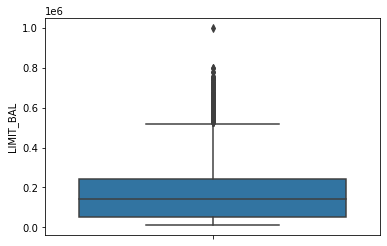

In [38]:
ax = sns.boxplot(y="LIMIT_BAL", data=df)

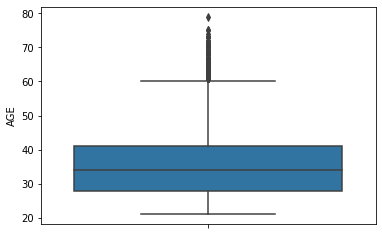

In [39]:
ax = sns.boxplot(y="AGE", data=df)

we have created a function that deletes outliers by using IQR

In [40]:
def iqr_outliers(data,feat):
    q3=data[feat].quantile(q=0.75)
    q1=data[feat].quantile(q=0.25) 
    IQR=q3-q1
    Lower_tail = q1 - 1.5 * IQR
    Upper_tail = q3 + 1.5 * IQR
    indexNames = data[ ((data[feat] >Upper_tail) | (data[feat] <Lower_tail) ) ].index
    print(len(indexNames))
    data.drop(indexNames , inplace=True)

In [41]:
iqr_outliers(df,'LIMIT_BAL')

160


In [42]:
iqr_outliers(df,'AGE')

229


we have checked haw many rows are left in our dataset

In [43]:
df.shape[0]

25263

##### 2-DATA SPLITING 

we will split our data between X(features) and y(LABEL)

In [44]:
X = df.drop('def_pay',axis=1)
y = df['def_pay']


we will split our X and y into train and test

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##### 3-DATA scaling

we need to scale our X_train and X_test for  better classification

In [46]:
from sklearn.preprocessing import StandardScaler

we initialize our scaler

In [47]:
scaler = StandardScaler()

now we call the fit_transform to our X_train and only the transform for X_test . The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance .

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### IV. Modeling 

##### 1- Logistic Regression

import and initialize our first model . we will be using the grid search for better performance . the grid search allows to find the best combination between the study parameters . we also choose to do a cross validation with k-folds = 10 to have a better model

In [49]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-5, 8, 15)}
log_model = LogisticRegression()
log_model_grid = GridSearchCV(log_model,param_grid,cv=10)


we train our model

In [50]:
log_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [51]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score 

We want to accurately evaluate our model .so we get performance metrics on the test set (data is never seen before by the model)

In [52]:
y_pred_log = log_model_grid.predict(X_test)

In [53]:
#evaluate our model's performance

The confusion_matrix method will give you an array that depicts the True Positives, False Positives, False Negatives, and True negatives .we plot the confusion matrix .

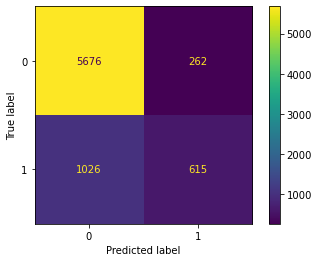

In [54]:
plot_confusion_matrix(log_model_grid,X_test,y_test)

In [55]:
#we gonna print the accuracy , Precision , Recall, F1 Score , ROC of our model
roc_log=roc_auc_score(y_test, y_pred_log)
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

results = pd.DataFrame([['Logistic Regression', acc_log,prec_log,rec_log, f1_log,roc_log]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.830057,0.701254,0.374771,0.488483,0.665324


In [56]:
#in order to understand better our model ,we will do the classification report .
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5938
           1       0.70      0.37      0.49      1641

    accuracy                           0.83      7579
   macro avg       0.77      0.67      0.69      7579
weighted avg       0.82      0.83      0.81      7579



##### we will treat the other models with same method

##### 2- KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier


In [58]:
knn = KNeighborsClassifier()

In [59]:
k_values = list(range(2,30))
#k_values=[17]
param_grid = {'n_neighbors': k_values}


In [60]:
knn_model_grid = GridSearchCV(knn,param_grid,cv=10)

In [61]:
knn_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29]})

In [62]:
#this function will give us the best parameter chosen by the gridsearch
knn_model_grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 17,
 'p': 2,
 'weights': 'uniform'}

Text(0, 0.5, 'error rate')

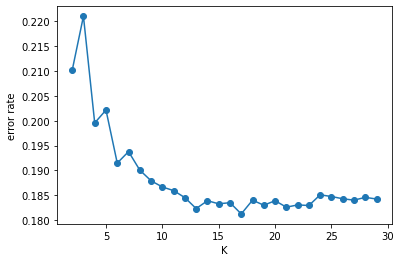

In [63]:
#this plot show us the error rate of each value of the parameter "K"
scores = 1-knn_model_grid.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("error rate")

In [64]:
y_pred_knn = knn_model_grid.predict(X_test)

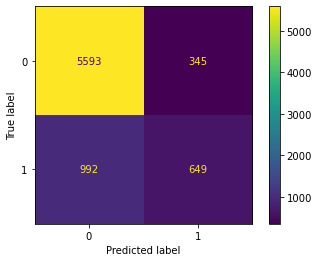

In [65]:
plot_confusion_matrix(knn_model_grid,X_test,y_test)

In [66]:
roc_knn=roc_auc_score(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

results = pd.DataFrame([['KNN', acc_knn,prec_knn,rec_knn, f1_knn,roc_knn]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.823592,0.652918,0.395491,0.4926,0.668695


In [67]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5938
           1       0.65      0.40      0.49      1641

    accuracy                           0.82      7579
   macro avg       0.75      0.67      0.69      7579
weighted avg       0.81      0.82      0.81      7579



##### 3- naive bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
N_Bayes = GaussianNB()

In [70]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
param_grid_nb = {'var_smoothing': [1]}
nb_model_grid = GridSearchCV(estimator=N_Bayes, param_grid=param_grid_nb, cv=10)


In [71]:
nb_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), param_grid={'var_smoothing': [1]})

In [72]:
nb_model_grid.best_estimator_.get_params()

{'priors': None, 'var_smoothing': 1}

In [73]:
y_pred_nb = nb_model_grid.predict(X_test)

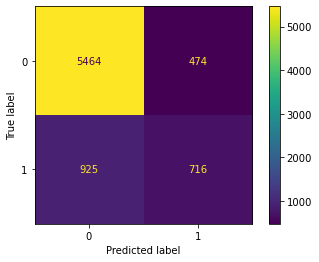

In [74]:
plot_confusion_matrix(nb_model_grid,X_test,y_test)

In [75]:
roc_nb=roc_auc_score(y_test, y_pred_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

results = pd.DataFrame([['naive_bayes', acc_nb,prec_nb,rec_nb, f1_nb,roc_nb]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,naive_bayes,0.815411,0.601681,0.436319,0.505828,0.678247


In [76]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5938
           1       0.60      0.44      0.51      1641

    accuracy                           0.82      7579
   macro avg       0.73      0.68      0.70      7579
weighted avg       0.80      0.82      0.80      7579



##### 4- Discriminant Analysis

In [77]:
#importing the LinearDiscriminantAnalysis library 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [78]:
# create the lda model
LDA_model=LinearDiscriminantAnalysis()

In [79]:
# define grid:with a grid of different solver values.
#Grid-searching is the process of scanning the data to configure optimal parameters for a given model
param_grid_lda = {'solver':['svd','lsqr','eigen'] }
param_grid_lda = {'solver': ['svd']}
# define search
LDA_model_grid = GridSearchCV(estimator=LDA_model, param_grid=param_grid_lda, cv=10)


In [80]:
# perform the search
LDA_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd']})

In [81]:
# summarize
LDA_model_grid.best_estimator_.get_params()

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [82]:
#predict
y_pred_LDA = LDA_model_grid.predict(X_test)

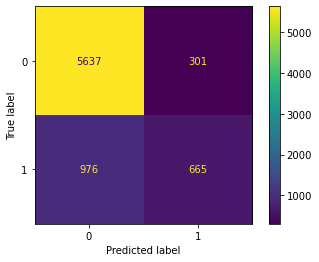

In [83]:
#visualisation of the matrix
plot_confusion_matrix(LDA_model_grid,X_test,y_test)

In [84]:
#caluclation pf accuracy ,precision ,recall f1 score and roc of this modele 
roc_LDA=roc_auc_score(y_test, y_pred_LDA)
acc_LDA = accuracy_score(y_test, y_pred_LDA)
prec_LDA = precision_score(y_test, y_pred_LDA)
rec_LDA = recall_score(y_test, y_pred_LDA)
f1_LDA = f1_score(y_test, y_pred_LDA)

results = pd.DataFrame([['discriminant_analysis', acc_LDA,prec_LDA,rec_LDA, f1_LDA,roc_LDA]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,discriminant_analysis,0.831508,0.688406,0.405241,0.510165,0.677275


In [85]:
print(classification_report(y_test,y_pred_LDA))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5938
           1       0.69      0.41      0.51      1641

    accuracy                           0.83      7579
   macro avg       0.77      0.68      0.70      7579
weighted avg       0.82      0.83      0.81      7579



##### 5- support vector machine

In [86]:
from sklearn.svm import SVC

In [87]:
svc = SVC()

In [88]:
# define parameter  grid
param_grid = {'C':[0.1,0.5,1],'gamma':['scale','auto'],'kernel':['linear','rbf']}
#param_grid = {'C':[1],'gamma':['scale'],'kernel':['rbf']}
# define search
svc_model_grid = GridSearchCV(svc,param_grid,cv=10)

In [89]:
#the fitting of the search
svc_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1], 'gamma': ['scale'], 'kernel': ['rbf']})

In [90]:
#the best parameteres
svc_model_grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [91]:
#prediction of the modele
y_pred_svc = svc_model_grid.predict(X_test)

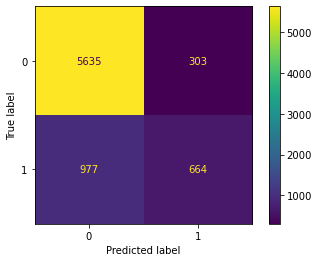

In [92]:
#the matrix visualisation
plot_confusion_matrix(svc_model_grid,X_test,y_test)

In [93]:
roc_svc=roc_auc_score(y_test, y_pred_svc)
acc_svc = accuracy_score(y_test, y_pred_svc)
prec_svc = precision_score(y_test, y_pred_svc)
rec_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

results = pd.DataFrame([['SVC', acc_svc,prec_svc,rec_svc, f1_svc,roc_svc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVC,0.831112,0.68666,0.404631,0.509202,0.676802


In [94]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5938
           1       0.69      0.40      0.51      1641

    accuracy                           0.83      7579
   macro avg       0.77      0.68      0.70      7579
weighted avg       0.82      0.83      0.81      7579



##### 6- Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
DecisionTree_model = DecisionTreeClassifier()

In [97]:
params = {'max_depth': list(range(2,20)),'min_samples_leaf':list(range(1,10)),'min_samples_split':list(range(2,10)),'criterion':['gini','entropy']}
params = {'max_depth': [2],'min_samples_leaf':[1],'min_samples_split':[2],'criterion':['entropy']}

In [98]:
DecisionTree_model_grid = GridSearchCV(DecisionTree_model,params,cv=10)

In [99]:
DecisionTree_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [2],
                         'min_samples_leaf': [1], 'min_samples_split': [2]})

In [100]:
DecisionTree_model_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [101]:
y_pred_DecisionTree = DecisionTree_model_grid.predict(X_test)

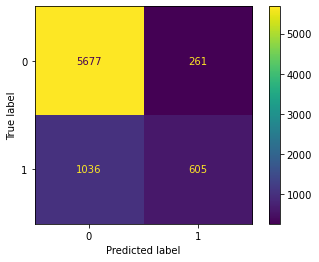

In [102]:
plot_confusion_matrix(DecisionTree_model_grid,X_test,y_test)

In [103]:
roc_DecisionTree=roc_auc_score(y_test, y_pred_DecisionTree)
acc_DecisionTree = accuracy_score(y_test, y_pred_DecisionTree)
prec_DecisionTree = precision_score(y_test, y_pred_DecisionTree)
rec_DecisionTree = recall_score(y_test, y_pred_DecisionTree)
f1_DecisionTree = f1_score(y_test, y_pred_DecisionTree)

results = pd.DataFrame([['DecisionTree', acc_DecisionTree,prec_DecisionTree,rec_DecisionTree, f1_DecisionTree,roc_DecisionTree]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,DecisionTree,0.828869,0.698614,0.368678,0.482649,0.662362


In [104]:
print(classification_report(y_test,y_pred_DecisionTree))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5938
           1       0.70      0.37      0.48      1641

    accuracy                           0.83      7579
   macro avg       0.77      0.66      0.69      7579
weighted avg       0.81      0.83      0.81      7579



In [105]:
from sklearn.tree import export_graphviz
import graphviz

we use this plot (Tree) in the case of manuel execution 

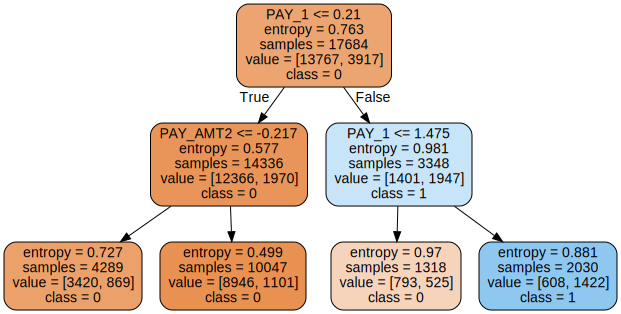

In [106]:
feature_names = X.columns
dot_data = export_graphviz(DecisionTree_model_grid.best_estimator_, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=['0','1'])
graph = graphviz.Source(dot_data)  
graph 

##### 7- AdaBoost

In [107]:
from sklearn.ensemble import AdaBoostClassifier

In [108]:
param_grid = {'n_estimators': [100,150,200,250,300],'algorithm': ['SAMME', 'SAMME.R'],'learning_rate' : [0.5, 0.75, 1.0]}
param_grid = {'n_estimators': [250],'algorithm': ['SAMME'],'learning_rate' : [ 1.0]}
ada_model = AdaBoostClassifier()

In [109]:
ada_model_grid = GridSearchCV(ada_model,param_grid,cv=10)

In [110]:
ada_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME'], 'learning_rate': [1.0],
                         'n_estimators': [250]})

In [111]:
ada_model_grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 250}

In [112]:
y_pred_ada = ada_model_grid.predict(X_test)

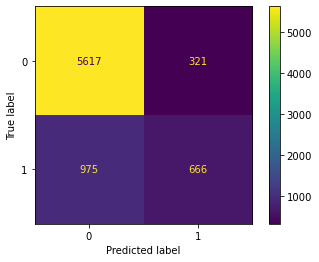

In [113]:
plot_confusion_matrix(ada_model_grid,X_test,y_test)

In [114]:
roc_ada=roc_auc_score(y_test, y_pred_ada)
acc_ada = accuracy_score(y_test, y_pred_ada)
prec_ada = precision_score(y_test, y_pred_ada)
rec_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

results = pd.DataFrame([['ADA boost', acc_ada,prec_ada,rec_ada, f1_ada,roc_ada]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,ADA boost,0.829001,0.674772,0.40585,0.506849,0.675896


In [115]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5938
           1       0.67      0.41      0.51      1641

    accuracy                           0.83      7579
   macro avg       0.76      0.68      0.70      7579
weighted avg       0.81      0.83      0.81      7579



##### 8- Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
RandomForest_model=RandomForestClassifier()

In [118]:
params = {'n_estimators' : [100,150,200,250,300],'criterion':['gini','entropy']}
params = {'n_estimators' : [150],'criterion':['gini']}

In [119]:
RandomForest_model_grid = GridSearchCV(RandomForest_model,params,cv=10)

In [120]:
RandomForest_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'n_estimators': [150]})

In [121]:
RandomForest_model_grid.best_params_

{'criterion': 'gini', 'n_estimators': 150}

In [122]:
y_pred_RandomForest = RandomForest_model_grid.predict(X_test)

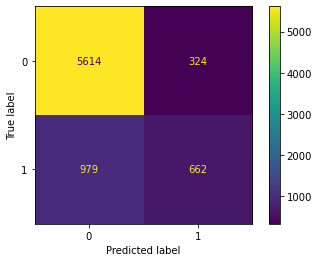

In [123]:
plot_confusion_matrix(RandomForest_model_grid,X_test,y_test)

In [124]:
roc_RandomForest=roc_auc_score(y_test, y_pred_RandomForest)
acc_RandomForest = accuracy_score(y_test, y_pred_RandomForest)
prec_RandomForest = precision_score(y_test, y_pred_RandomForest)
rec_RandomForest = recall_score(y_test, y_pred_RandomForest)
f1_RandomForest = f1_score(y_test, y_pred_RandomForest)

results = pd.DataFrame([['Random Forest', acc_RandomForest,prec_RandomForest,rec_RandomForest, f1_RandomForest,roc_RandomForest]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.828078,0.6714,0.403413,0.503997,0.674424


In [125]:
print(classification_report(y_test,y_pred_RandomForest))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5938
           1       0.67      0.40      0.50      1641

    accuracy                           0.83      7579
   macro avg       0.76      0.67      0.70      7579
weighted avg       0.81      0.83      0.81      7579



##### 9) Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
param_grid = {'n_estimators': [100,150,200,300],'learning_rate' : [0.25,0.5, 0.75, 1.0]}
param_grid = {'n_estimators': [100],'learning_rate' : [0.25]}

In [128]:
gb_model = GradientBoostingClassifier()

In [129]:
gb_model_grid = GridSearchCV(gb_model,param_grid,cv=10)

In [130]:
gb_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.25], 'n_estimators': [100]})

In [131]:
gb_model_grid.best_params_

{'learning_rate': 0.25, 'n_estimators': 100}

In [132]:
y_pred_gb = gb_model_grid.predict(X_test)

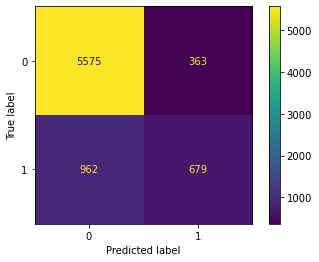

In [133]:
plot_confusion_matrix(gb_model_grid,X_test,y_test)

In [134]:
roc_gb=roc_auc_score(y_test, y_pred_gb)
acc_gb = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb)
rec_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

results = pd.DataFrame([['GradientBoosting', acc_gb,prec_gb,rec_gb, f1_gb,roc_gb]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,GradientBoosting,0.825175,0.651631,0.413772,0.50615,0.67632


In [135]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5938
           1       0.65      0.41      0.51      1641

    accuracy                           0.83      7579
   macro avg       0.75      0.68      0.70      7579
weighted avg       0.81      0.83      0.81      7579



##### 10- XGBoost

In [136]:
from xgboost import XGBClassifier

In [137]:
xgb_model= XGBClassifier()

In [138]:
param_grid = {"learning_rate"    : [0.05, 0.10, 0.20, 0.30] ,
                  "max_depth"        : [3, 5, 10, 12, 15],
                 "min_child_weight" : [1, 5, 7],
                 "gamma"            : [ 0.1 , 0.3, 0.4,0.5],
                 "colsample_bytree" : [0.3, 0.5 , 0.7,0.8] ,
             "use_label_encoder" :[False],
             "eval_metric":['mlogloss']}
param_grid = {"learning_rate"    : [0.05] ,
                  "max_depth"        : [5],
                 "min_child_weight" : [1],
                 "gamma"            : [0.5],
                 "colsample_bytree" : [0.8] ,
             "use_label_encoder" :[False],
             "eval_metric":['mlogloss']}

In [139]:
xgb_model_grid = GridSearchCV(xgb_model,param_grid,cv=10)

In [140]:
xgb_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [141]:
xgb_model_grid.best_params_

{'colsample_bytree': 0.8,
 'eval_metric': 'mlogloss',
 'gamma': 0.5,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'use_label_encoder': False}

In [142]:
y_pred_xgb = xgb_model_grid.predict(X_test)

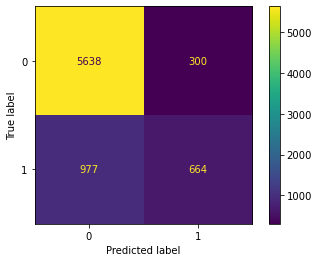

In [143]:
plot_confusion_matrix(xgb_model_grid,X_test,y_test)

In [144]:
roc_xgb=roc_auc_score(y_test, y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

results = pd.DataFrame([['XGBOOST', acc_xgb,prec_xgb,rec_xgb, f1_xgb,roc_xgb]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST,0.831508,0.688797,0.404631,0.509789,0.677055


In [145]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5938
           1       0.69      0.40      0.51      1641

    accuracy                           0.83      7579
   macro avg       0.77      0.68      0.70      7579
weighted avg       0.82      0.83      0.81      7579



##### 11- artificial neural network

In [146]:
from keras.models import Sequential
from keras.layers import Dense

In the artificial neural network , we used 6 layers                                
the input layer takes our dataset                                                                  
the first hidden layer is composed by 50 units                                                          
the second one is composed by 40 units                                                            
the third hidden layer is composed by 30 units                                                               
the fourth hidden layer is composed by 20 units                                                                 
the last one is the output layer it takes 1 unit             

In [147]:
ANN_model = Sequential()
ANN_model.add(Dense(units=50,input_dim=X_train.shape[1], activation='relu'))
ANN_model.add(Dense(units=40, activation='relu'))
ANN_model.add(Dense(units=30, activation='relu'))
ANN_model.add(Dense(units=20, activation='relu'))
ANN_model.add(Dense(units=1, activation='sigmoid'))

In [148]:
ANN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [149]:
ANN_model.fit(X_train,y_train, epochs=100, batch_size=10)

Epoch 1/100
1769/1769 [==============================] - 3s 1ms/step - loss: 0.4445 - accuracy: 0.8165
Epoch 2/100
1769/1769 [==============================] - 2s 1ms/step - loss: 0.4294 - accuracy: 0.8240
Epoch 3/100
1769/1769 [==============================] - 2s 1ms/step - loss: 0.4239 - accuracy: 0.8246
Epoch 4/100
1769/1769 [==============================] - 2s 1ms/step - loss: 0.4230 - accuracy: 0.8261
Epoch 5/100
1769/1769 [==============================] - 2s 1ms/step - loss: 0.4203 - accuracy: 0.8262
Epoch 6/100
1769/1769 [==============================] - 3s 2ms/step - loss: 0.4188 - accuracy: 0.8270
Epoch 7/100
1769/1769 [==============================] - 2s 1ms/step - loss: 0.4172 - accuracy: 0.8275
Epoch 8/100
1769/1769 [==============================] - 2s 1ms/step - loss: 0.4154 - accuracy: 0.8275
Epoch 9/100
1769/1769 [==============================] - 2s 1ms/step - loss: 0.4132 - accuracy: 0.8285
Epoch 10/100
1769/1769 [==============================] - 3s 1ms/step - l

In [150]:
y_pred_ann = ANN_model.predict(X_test)

In [151]:
#the values we had with the y_pred_ann are between  0 and 1 so we did the round of the value
y_pred_ann = (y_pred_ann > 0.5)

In [152]:
confusion_matrix(y_test, y_pred_ann)

array([[5478,  460],
       [1007,  634]], dtype=int64)

In [153]:
roc_ann=roc_auc_score(y_test, y_pred_ann)
acc_ann = accuracy_score(y_test, y_pred_ann)
prec_ann = precision_score(y_test, y_pred_ann)
rec_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)

results = pd.DataFrame([['ANN', acc_ann,prec_ann,rec_ann, f1_ann,roc_ann]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,ANN,0.806439,0.579525,0.38635,0.46362,0.654441


In [154]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      5938
           1       0.58      0.39      0.46      1641

    accuracy                           0.81      7579
   macro avg       0.71      0.65      0.67      7579
weighted avg       0.79      0.81      0.79      7579



##### 12- lightGBoost

In [155]:
import lightgbm as lgb

In [156]:
param_grid = {"learning_rate"    : [0.05, 0.10, 0.20, 0.30] ,
                  "max_depth"        : [3, 5, 10, 12, 15],
                 "min_child_weight" : [1, 5, 7],
                 "colsample_bytree" : [0.3, 0.5 , 0.7,0.8] }
param_grid = {"learning_rate"    : [0.05] ,
                  "max_depth"        : [5],
                 "min_child_weight" : [5],
                 "colsample_bytree" : [ 0.7] }

In [157]:
lgb_model= lgb.LGBMClassifier()

In [158]:
lgb_model_grid = GridSearchCV(lgb_model,param_grid,cv=10)

In [159]:
lgb_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [5], 'min_child_weight': [5]})

In [160]:
lgb_model_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 5}

In [161]:
y_pred_lgb = lgb_model_grid.predict(X_test)

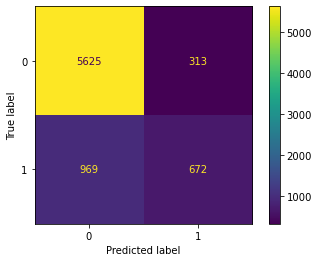

In [162]:
plot_confusion_matrix(lgb_model_grid,X_test,y_test)

In [163]:
roc_lgb=roc_auc_score(y_test, y_pred_lgb)
acc_lgb = accuracy_score(y_test, y_pred_lgb)
prec_lgb = precision_score(y_test, y_pred_lgb)
rec_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

results = pd.DataFrame([['LightGBM', acc_lgb,prec_lgb,rec_lgb, f1_lgb,roc_lgb]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,LightGBM,0.830848,0.682234,0.409506,0.511805,0.678398


In [164]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5938
           1       0.67      0.41      0.51      1641

    accuracy                           0.83      7579
   macro avg       0.76      0.68      0.70      7579
weighted avg       0.81      0.83      0.81      7579



##### 13- CatBoost

In [165]:
from catboost import CatBoostClassifier

In [166]:
cat_model= CatBoostClassifier(logging_level="Silent")

In [167]:
param_grid = {"learning_rate"    : [ 0.05,0.10, 0.20, 0.30] }
param_grid = {"learning_rate"    : [ 0.05] }

In [168]:
cat_model_grid = GridSearchCV(cat_model,param_grid,cv=10)

In [169]:
cat_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002D052F55B50>,
             param_grid={'learning_rate': [0.05]})

In [170]:
cat_model_grid.best_params_

{'learning_rate': 0.05}

In [171]:
y_pred_cat = cat_model_grid.predict(X_test)

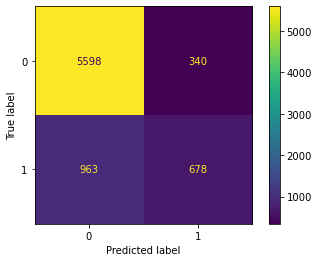

In [172]:
plot_confusion_matrix(cat_model_grid,X_test,y_test)

In [173]:
roc_cat=roc_auc_score(y_test, y_pred_cat)
acc_cat = accuracy_score(y_test, y_pred_cat)
prec_cat = precision_score(y_test, y_pred_cat)
rec_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)

results = pd.DataFrame([['CAT BOOST', acc_cat,prec_cat,rec_cat, f1_cat,roc_cat]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,CAT BOOST,0.828078,0.666012,0.413163,0.509966,0.677952


In [174]:
print(classification_report(y_test,y_pred_cat))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      5938
           1       0.67      0.41      0.51      1641

    accuracy                           0.83      7579
   macro avg       0.76      0.68      0.70      7579
weighted avg       0.81      0.83      0.81      7579



#### V. Evaluation

In [175]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [176]:
#we will calculate the false positive rate and true positive rate of each model to plot the roc curve
fpr_log, tpr_log, threshold_log = roc_curve(y_test, y_pred_log)
roc_auc_log = auc(fpr_log, tpr_log)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test, y_pred_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
fpr_DecisionTree, tpr_DecisionTree, threshold_DecisionTree = roc_curve(y_test, y_pred_DecisionTree)
roc_auc_DecisionTree = auc(fpr_DecisionTree, tpr_DecisionTree)
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
fpr_LDA, tpr_LDA, threshold_LDA = roc_curve(y_test, y_pred_LDA)
roc_auc_LDA = auc(fpr_LDA, tpr_LDA)
fpr_RandomForest, tpr_RandomForest, threshold_RandomForest = roc_curve(y_test, y_pred_RandomForest)
roc_auc_RandomForest = auc(fpr_RandomForest, tpr_RandomForest)
fpr_ada, tpr_ada, threshold_ada = roc_curve(y_test, y_pred_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)
fpr_gb, tpr_gb, threshold_gb = roc_curve(y_test, y_pred_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
fpr_ann, tpr_ann, threshold_ann = roc_curve(y_test, y_pred_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
fpr_cat, tpr_cat, threshold_cat = roc_curve(y_test, y_pred_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)
fpr_lgb, tpr_lgb, threshold_lgb = roc_curve(y_test, y_pred_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

we are going to plot the ROC curve of different models to check whether we are approaching the overfitting

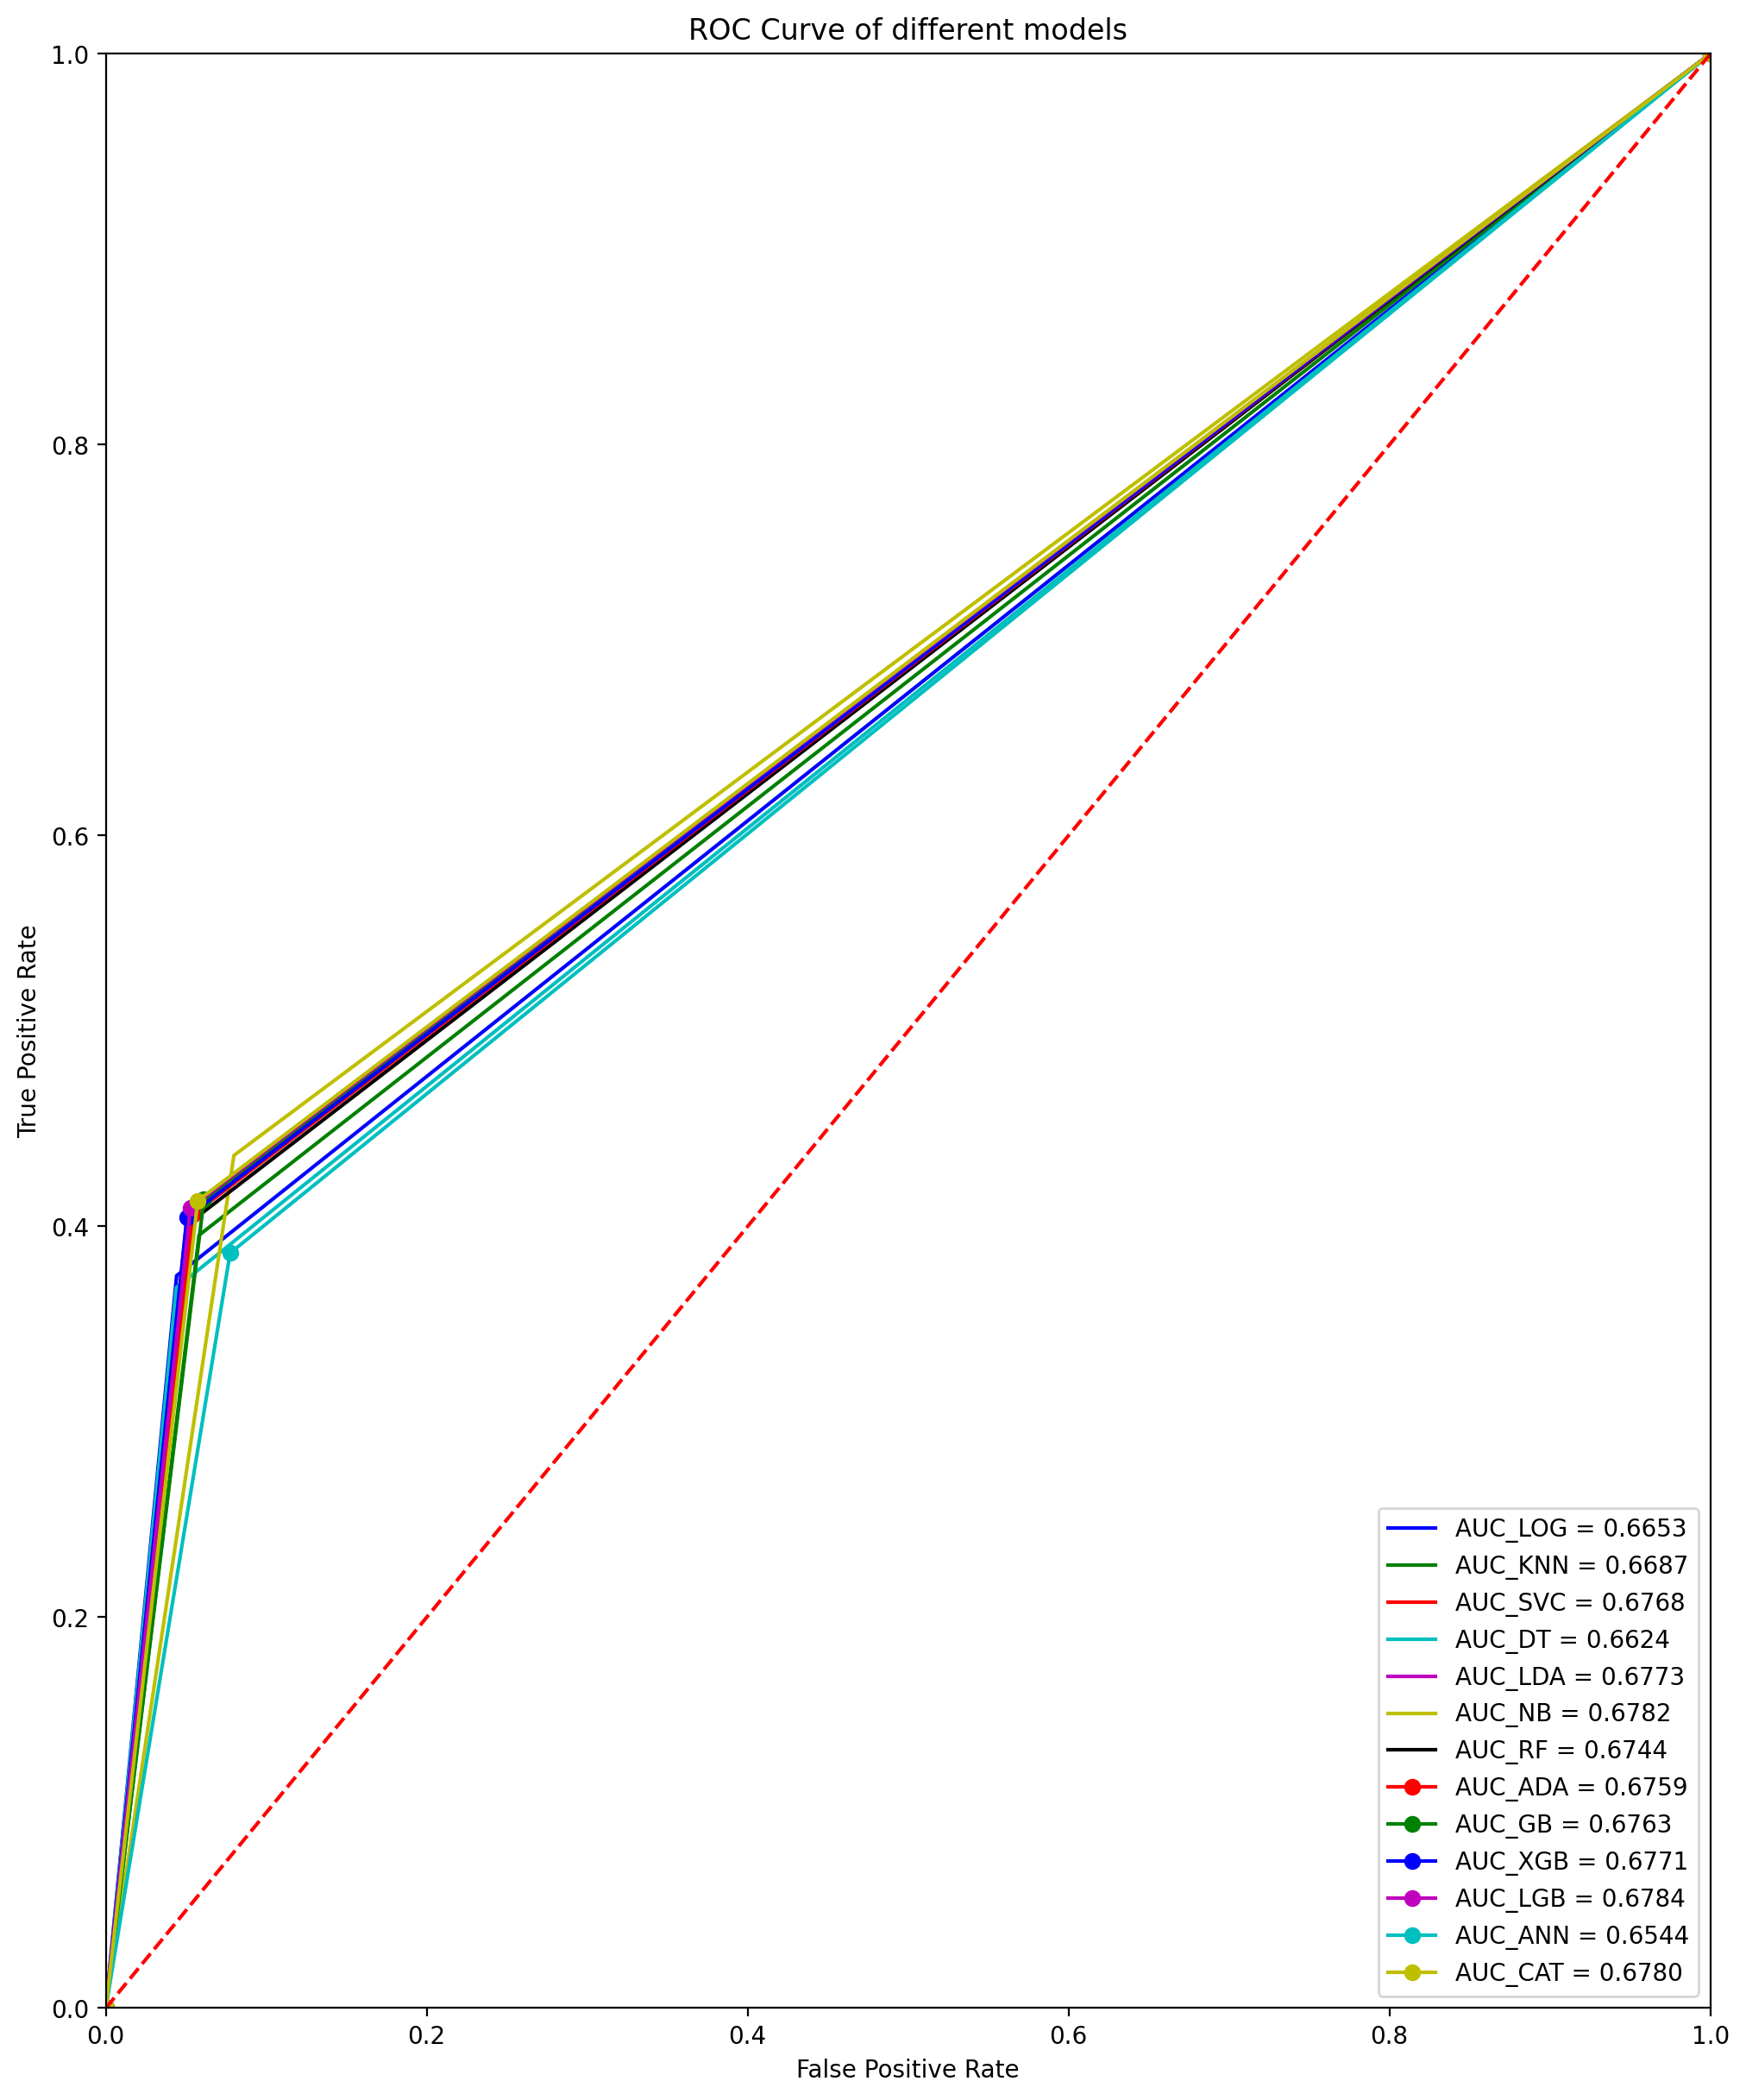

In [177]:
plt.figure(figsize=[12,15], dpi=200)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_log, tpr_log, 'b', label = 'AUC_LOG = %0.4f' % roc_auc_log)
plt.plot(fpr_knn, tpr_knn, 'g', label = 'AUC_KNN = %0.4f' % roc_auc_knn)
plt.plot(fpr_svc, tpr_svc, 'r', label = 'AUC_SVC = %0.4f' % roc_auc_svc)
plt.plot(fpr_DecisionTree, tpr_DecisionTree, 'c', label = 'AUC_DT = %0.4f' % roc_auc_DecisionTree)
plt.plot(fpr_LDA, tpr_LDA, 'm', label = 'AUC_LDA = %0.4f' % roc_auc_LDA)
plt.plot(fpr_nb, tpr_nb, 'y', label = 'AUC_NB = %0.4f' % roc_auc_nb)
plt.plot(fpr_RandomForest, tpr_RandomForest, 'k', label = 'AUC_RF = %0.4f' % roc_auc_RandomForest)
plt.plot(fpr_ada, tpr_ada, 'ro-', label = 'AUC_ADA = %0.4f' % roc_auc_ada)
plt.plot(fpr_gb, tpr_gb, 'go-', label = 'AUC_GB = %0.4f' % roc_auc_gb)
plt.plot(fpr_xgb, tpr_xgb, 'bo-', label = 'AUC_XGB = %0.4f' % roc_auc_xgb)
plt.plot(fpr_lgb, tpr_lgb, 'mo-', label = 'AUC_LGB = %0.4f' % roc_auc_lgb)
plt.plot(fpr_ann, tpr_ann, 'co-', label = 'AUC_ANN = %0.4f' % roc_auc_ann)
plt.plot(fpr_cat, tpr_cat, 'yo-', label = 'AUC_CAT = %0.4f' % roc_auc_cat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of different models')
plt.show()

it is clear that we are far away from the overfitting . we can also check the level of accuracy ,precision and recall to confirm the previous conclusion

In [178]:
results = pd.DataFrame([['Logistic Regression', acc_log,prec_log,rec_log, f1_log,roc_log],
                        ['KNN', acc_knn,prec_knn,rec_knn, f1_knn,roc_knn],
                        ['naive_bayes', acc_nb,prec_nb,rec_nb, f1_nb,roc_nb],
                        ['discriminant_analysis', acc_LDA,prec_LDA,rec_LDA, f1_LDA,roc_LDA],
                        ['SVC', acc_svc,prec_svc,rec_svc, f1_svc,roc_svc],
                        ['DecisionTree', acc_DecisionTree,prec_DecisionTree,rec_DecisionTree, f1_DecisionTree,roc_DecisionTree],
                        ['ADA boost', acc_ada,prec_ada,rec_ada, f1_ada,roc_ada],
                        ['Random Forest', acc_RandomForest,prec_RandomForest,rec_RandomForest, f1_RandomForest,roc_RandomForest],
                        ['GradientBoosting', acc_gb,prec_gb,rec_gb, f1_gb,roc_gb],
                        ['XGBOOST', acc_xgb,prec_xgb,rec_xgb, f1_xgb,roc_xgb],
                       ['LightGBOOST', acc_lgb,prec_lgb,rec_lgb, f1_lgb,roc_lgb],
                       ['ANN', acc_ann,prec_ann,rec_ann, f1_ann,roc_ann],
                       ['CATBOOST', acc_cat,prec_cat,rec_cat, f1_cat,roc_cat]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.830057,0.701254,0.374771,0.488483,0.665324
1,KNN,0.823592,0.652918,0.395491,0.492600,0.668695
2,naive_bayes,0.815411,0.601681,0.436319,0.505828,0.678247
3,discriminant_analysis,0.831508,0.688406,0.405241,0.510165,0.677275
4,SVC,0.831112,0.686660,0.404631,0.509202,0.676802
5,DecisionTree,0.828869,0.698614,0.368678,0.482649,0.662362
6,ADA boost,0.829001,0.674772,0.405850,0.506849,0.675896
7,Random Forest,0.828078,0.671400,0.403413,0.503997,0.674424
8,GradientBoosting,0.825175,0.651631,0.413772,0.506150,0.676320
9,XGBOOST,0.831508,0.688797,0.404631,0.509789,0.677055


In [179]:
results.sort_values(by=['F1 Score'])

,Model,Accuracy,Precision,Recall,F1 Score,ROC
11,ANN,0.806439,0.579525,0.386350,0.463620,0.654441
5,DecisionTree,0.828869,0.698614,0.368678,0.482649,0.662362
0,Logistic Regression,0.830057,0.701254,0.374771,0.488483,0.665324
1,KNN,0.823592,0.652918,0.395491,0.492600,0.668695
7,Random Forest,0.828078,0.671400,0.403413,0.503997,0.674424
2,naive_bayes,0.815411,0.601681,0.436319,0.505828,0.678247
8,GradientBoosting,0.825175,0.651631,0.413772,0.506150,0.676320
6,ADA boost,0.829001,0.674772,0.405850,0.506849,0.675896
4,SVC,0.831112,0.686660,0.404631,0.509202,0.676802
9,XGBOOST,0.831508,0.688797,0.404631,0.509789,0.677055


as a bank ,we can't predict the client who don't pay as they pay because it will be a loss of money                     
as a bank either , we can't predict a client who will pay as he won't pay because we will have a bad reputation and we will lose ours clients

PRECISION = TP/(TP+FP)  

the precision give us informations about the clients who will pay and they are predicted as they won't pay

RECALL= TP/(TP+FN)

the recall give us informations about the clients who won't pay and they are predicted as they do

F1 SCORE=2 X ((precision X recall)/(precision+recall))                          

F1 score is the harmonic mean of Recall and Precision .In addition we often use the F1score to evaluate unbalaced datasets. It balances out the strengths of them and it is useful in cases where both recall and precision can be valuable.


As a bank, we would like to be able to predict the maximum number of default payment( true positive values ) by taking into account the False Negative values and the False Positive values. As a result, the lightGBOOST model is found to be better than the other models.

 #### VI. Deploiement (optionnel)

In [180]:
import joblib

we will save the best model in pkl file

In [181]:
joblib.dump(lgb_model_grid,'lgb_model.pkl')

['lgb_model.pkl']

we will save the names of features in pkl file

In [182]:
joblib.dump(list(X.columns),'col_names.pkl')

['col_names.pkl']

we have created a flask script ( python script) that consume our model as API